In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
import os

import seaborn as sns

from src.utils.images import load_images_from_directory

In [6]:
images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in load_images_from_directory(".\data\qsd1_w1")]

In [7]:
images[5].shape

(510, 412)

In [8]:
images2 = load_images_from_directory(".\data\qsd1_w1")

In [9]:
def showimage(myimage, figsize=[10,10]):
    if (myimage.ndim>2):  #This only applies to RGB or RGBA images (e.g. not to Black and White images)
        myimage = myimage[:,:,::-1] #OpenCV follows BGR order, while matplotlib likely follows RGB order
         
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(myimage, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [10]:
def create_gaborfilter():
    # This function is designed to produce a set of GaborFilters 
    # an even distribution of theta values equally distributed amongst pi rad / 180 degree
     
    filters = []
    num_filters = 16
    ksize = 35  # The local area to evaluate
    sigma = 3.0  # Larger Values produce more edges
    lambd = 10.0
    gamma = 0.5
    psi = 0  # Offset value - lower generates cleaner results
    for theta in np.arange(0, np.pi, np.pi / num_filters):  # Theta is the orientation for edge detection
        kern = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
        kern /= 1.0 * kern.sum()  # Brightness normalization
        filters.append(kern)
    return filters

In [11]:
def apply_filter(img, filters):
# This general function is designed to apply filters to our image
     
    # First create a numpy array the same size as our input image
    newimage = np.zeros_like(img)
     
    # Starting with a blank image, we loop through the images and apply our Gabor Filter
    # On each iteration, we take the highest value (super impose), until we have the max value across all filters
    # The final image is returned
    depth = -1 # remain depth same as original image
     
    for kern in filters:  # Loop through the kernels in our GaborFilter
        image_filter = cv2.filter2D(img, depth, kern)  #Apply filter to image
         
        # Using Numpy.maximum to compare our filter and cumulative image, taking the higher value (max)
        np.maximum(newimage, image_filter, newimage)
    return newimage

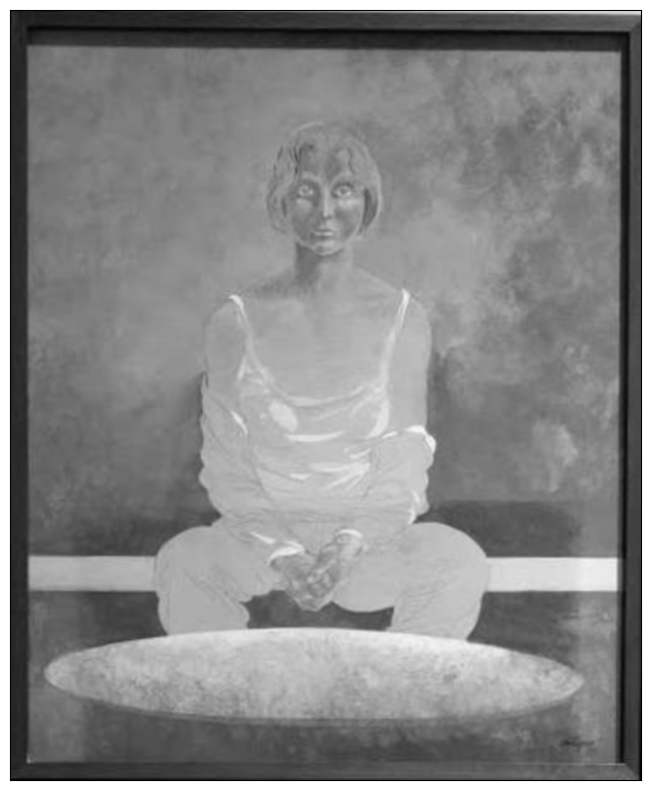

In [12]:
showimage(images[4])

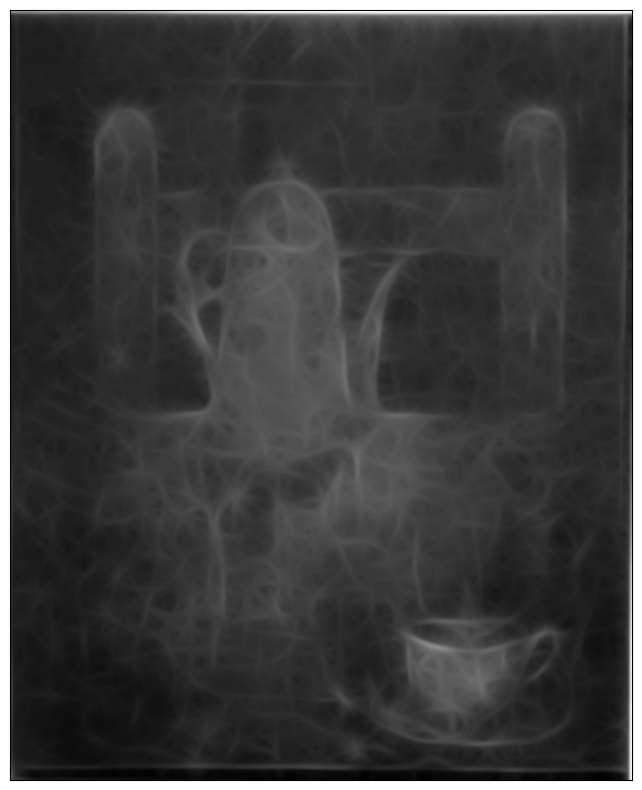

In [28]:
gfilters = create_gaborfilter()
image_g = apply_filter(images[5], gfilters)
 
showimage(image_g)

In [30]:
images[5].shape

(510, 412)

In [29]:
image_g.shape

(510, 412)

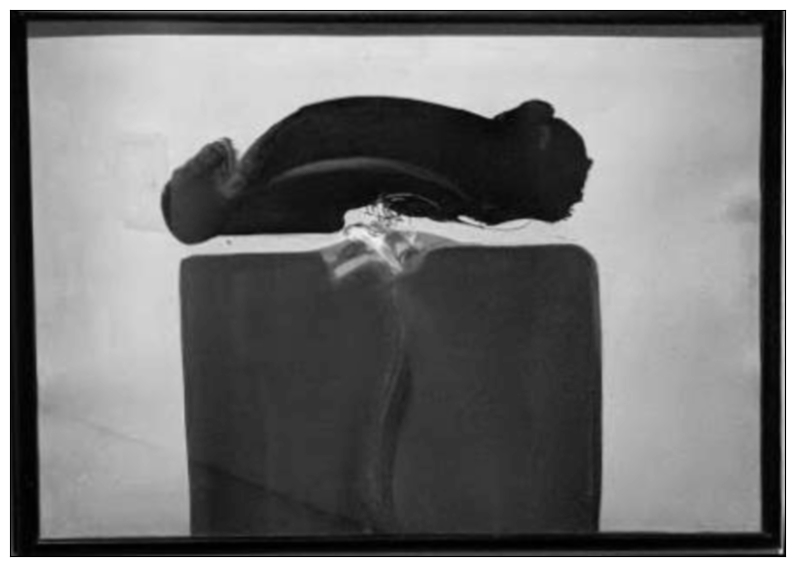

In [14]:
showimage(images[6])

In [15]:
images2[6].shape

(310, 440, 3)

In [16]:
images[6].shape

(310, 440)

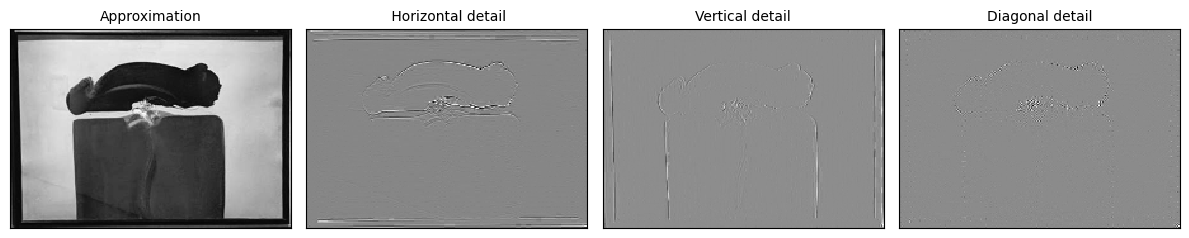

In [17]:
# Load image
original1 =  cv2.cvtColor(images2[6], cv2.COLOR_RGB2HSV)
H, S, V = cv2.split(original1)
original =  cv2.cvtColor(images2[6], cv2.COLOR_RGB2LAB)
L, A, B = cv2.split(original)

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(L, 'coif1')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [18]:
for a in [LL, LH, HL, HH]:
    print(a.shape)

(157, 222)
(157, 222)
(157, 222)
(157, 222)


(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00,
        8.0000e+00, 2.0000e+00, 0.0000e+00, 4.0000e+00, 1.1000e+01,
        1.3000e+01, 1.4000e+01, 1.6000e+01, 1.1000e+01, 1.3000e+01,
        4.0000e+00, 1.6000e+01, 5.0000e+00, 1.8000e+01, 2.5000e+01,
        1.5000e+01, 2.1000e+01, 1.9000e+01, 3.0000e+01, 2.0000e+01,
        1.9000e+01, 2.6000e+01, 2.5000e+01, 3.8000e+01, 4.9000e+01,
        4.3000e+01, 4.9000e+01, 3.7000e+01, 6.7000e+01, 7.1000e+01,
        8.3000e+01, 1.0200e+02, 1.2700e+02, 9.9000e+01, 1.3400e+02,
        1.5200e+02, 1.5100e+02, 1.8200e+02, 2.7300e+02, 4.2400e+02,
        1.1390e+03, 6.5030e+03, 1.9467e+04, 2.3640e+03, 7.8700e+02,
        3.8300e+02, 2.9400e+02, 1.8900e+02, 1.31

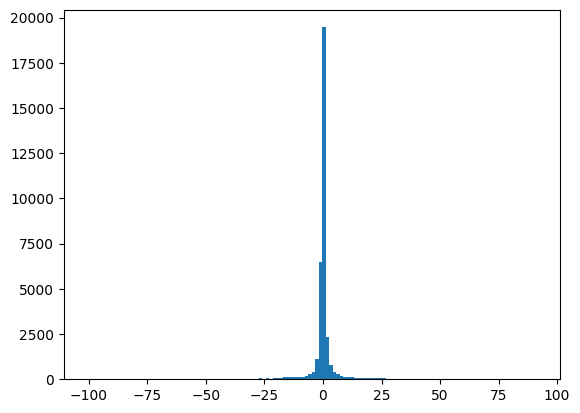

In [19]:
plt.hist(LH.flatten(), bins=128)

In [20]:
np.histogram(HL.flatten(), bins=128)[0]

array([    1,     0,     0,     0,     0,     1,     0,     1,     0,
           0,     0,     0,     0,     0,     1,     0,     0,     0,
           0,     0,     3,     0,     2,     0,     0,     0,     2,
           3,     2,     1,     4,     8,     8,     4,     4,     3,
           6,    15,    13,    11,    11,     8,     6,     6,     3,
           9,    16,    20,    23,    26,    27,    32,    39,    29,
          28,    32,    25,    38,    31,    45,    42,    61,    59,
          65,    71,   102,   145,   282,   652,  2450, 23346,  4702,
         872,   365,   208,   105,    88,    60,    59,    52,    43,
          39,    42,    43,    30,    36,    25,    18,    21,    26,
          13,    22,    21,    10,    15,    12,    18,    12,     7,
           9,     5,     7,     5,     5,     7,     5,     6,     6,
           1,     3,     3,     4,     0,     0,     0,     0,     1,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     1]

In [21]:
LH

array([[ 4.45435051e+00,  5.47493361e+00,  1.91566063e+00, ...,
        -6.76064488e-03, -3.89858936e-01, -1.36763157e+00],
       [-4.95019916e+00, -9.62832922e+00,  4.95914648e-01, ...,
        -5.55096325e-02, -5.94194066e-01, -8.74233936e-01],
       [-2.10082719e+00,  2.24790719e-01, -4.73112716e+00, ...,
         2.96456244e-01,  6.59579219e-01,  8.12484621e-01],
       ...,
       [ 6.89823502e-01, -4.60725046e+00,  7.30405344e+00, ...,
        -2.06479876e+01, -2.55453300e+01,  7.69528367e+00],
       [-3.59822783e+00,  2.47046571e+00, -1.34329289e+01, ...,
         7.16275929e+01,  8.19443897e+01,  2.47475291e+01],
       [-1.03241399e+00, -8.84410627e-01,  1.13853763e+00, ...,
        -6.39702091e+01, -6.53414816e+01, -2.78259745e+01]])

<Axes: >

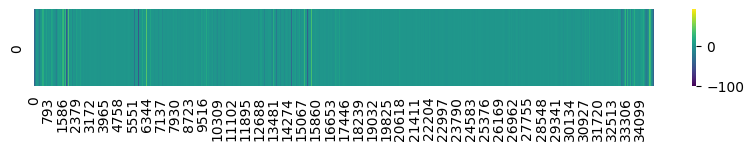

In [22]:
plt.figure(figsize=(10, 1))
plt.gca().spines[:].set_visible(False)  # Hide all four spines
plt.gca().tick_params(left=False, bottom=False)  # Hide ticks

sns.heatmap(LH.flatten().reshape(1,-1), cmap="viridis")


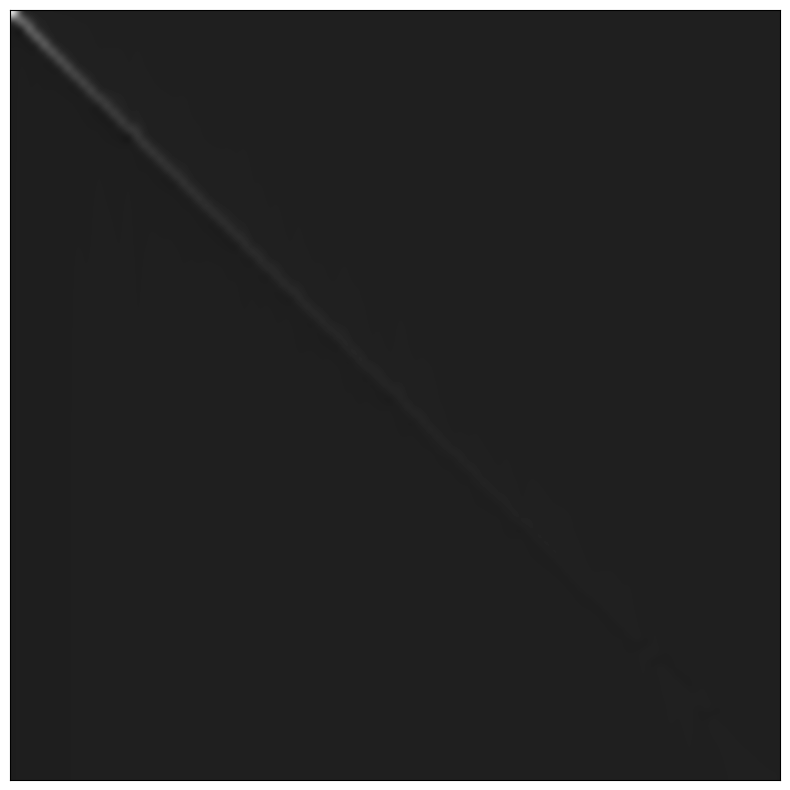

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca_img = pca.fit_transform(LH)
pca_img = pca.fit_transform(pca_img.T)

showimage(pca_img)

<Axes: >

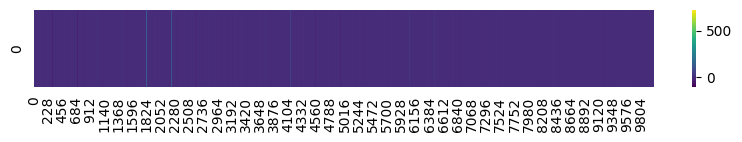

In [24]:
plt.figure(figsize=(10, 1))
plt.gca().spines[:].set_visible(False)  # Hide all four spines
plt.gca().tick_params(left=False, bottom=False)  # Hide ticks

sns.heatmap(pca_img.flatten().reshape(1,-1), cmap="viridis")

In [25]:
pywt.wavelist(kind='discrete')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

In [26]:
original1[:, :, 2]

array([[  8,   7,   7, ...,  12,  20, 118],
       [ 18,  16,   7, ...,  12,  19, 116],
       [  7,  13,  12, ...,  13,  18, 113],
       ...,
       [ 67,  59,  17, ..., 156, 157,   3],
       [ 65,  63,  36, ..., 142, 134,  25],
       [ 63,  66,  51, ...,  14,  11,   3]], dtype=uint8)

In [27]:
original[:,:,0]

array([[  1,   1,   1, ...,   6,  11, 122],
       [  9,   8,   1, ...,   6,  11, 120],
       [  1,   6,   6, ...,   6,  10, 117],
       ...,
       [ 64,  54,   8, ..., 160, 161,   0],
       [ 61,  59,  26, ..., 147, 139,  17],
       [ 58,  62,  44, ...,   7,   6,   0]], dtype=uint8)